In [119]:
# Import required libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import geopandas as gpd

In [120]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [121]:
# from google.colab import drive
# drive.mount('/content/drive/')

In [122]:
# %cd /content/drive/MyDrive/Projects/philippines-chapter-urban-vunerability/src

## Importing data

In [123]:
df = gpd.read_file('../../data/merged-dataset/merged-dataset-shpfile/merged-dataset.shp')
df = pd.DataFrame(df)
df.head()

,psgc,name,city_munic,province,clean_idx,longitude,latitude,coords,2018 - Loc,2018 - L_1,...,Child He_1,Single Hea,Single H_1,Disability,Disabili_1,Solo Paren,Solo Par_1,Older_Male,Older_Fema,geometry
0,1705301000,Aborlan,Aborlan,Palawan,"aborlan, palawan",118.548417,9.437101,"9.4371009, 118.5484168",0.0072,0.0224,...,3,580,17,1240,1040,620,1290,1990,1730,"MULTIPOLYGON (((118.57998 9.37215, 118.57982 9..."
1,1705101000,Abra De Ilog,Abra De Ilog,Occidental Mindoro,"abradeilog, occidentalmindoro",120.726826,13.443721,"13.4437209, 120.7268262",0.0027,0.0102,...,1,430,9,980,890,1030,1610,2040,1900,"POLYGON ((120.60896 13.35233, 120.60797 13.373..."
2,300801000,Abucay,Abucay,Bataan,"abucay, bataan",120.534870,14.721315,"14.7213146, 120.5348704",0.0488,0.0020,...,0,1460,6,330,180,110,530,340,400,"POLYGON ((120.45676 14.69671, 120.45620 14.696..."
3,201501000,Abulug,Abulug,Cagayan,"abulug, cagayan",121.457273,18.443485,"18.4434854, 121.4572732",0.0651,0.0052,...,0,90,8,610,380,320,760,1170,1440,"MULTIPOLYGON (((121.40276 18.40896, 121.40276 ..."
4,803701000,Abuyog,Abuyog,Leyte,"abuyog, leyte",125.011485,10.747102,"10.747102, 125.0114853",0.0115,0.0208,...,1,550,7,2010,2260,1840,3920,4270,4920,"POLYGON ((125.04650 10.56751, 125.04588 10.576..."


In [124]:
# Set the index as a city_munic
df = pd.DataFrame(df).set_index('city_munic')

In [125]:
# checking all the columns name
df.columns.tolist()

['psgc',
 'name',
 'province',
 'clean_idx',
 'longitude',
 'latitude',
 'coords',
 '2018 - Loc',
 '2018 - L_1',
 '2018 - Act',
 '2018 - Saf',
 '2018 - Emp',
 '2018 - Cos',
 '2018 - C_1',
 '2018 - Fin',
 '2018 - Pro',
 '2018 - Pre',
 '2018 - Com',
 '2018 - P_1',
 '2018 - C_2',
 '2018 - Cap',
 '2018 - C_3',
 '2018 - C_4',
 '2018 - Rec',
 '2018 - Get',
 '2018 - Pea',
 '2018 - Soc',
 '2018 - Roa',
 '2018 - Dis',
 '2018 - Ava',
 '2018 - Tra',
 '2018 - Edu',
 '2018 - Hea',
 '2018 - LGU',
 '2018 - Acc',
 '2018 - Inf',
 '2018 - F_1',
 '2018 - Lan',
 '2018 - D_1',
 '2018 - Ann',
 '2018 - Ear',
 '2018 - Bud',
 '2018 - L_2',
 '2018 - Eme',
 '2018 - Uti',
 '2018 - E_1',
 '2018 - San',
 '2019 - Loc',
 '2019 - L_1',
 '2019 - Act',
 '2019 - Saf',
 '2019 - Emp',
 '2019 - Cos',
 '2019 - C_1',
 '2019 - Fin',
 '2019 - Pro',
 '2019 - Pre',
 '2019 - Com',
 '2019 - P_1',
 '2019 - C_2',
 '2019 - Cap',
 '2019 - C_3',
 '2019 - C_4',
 '2019 - Rec',
 '2019 - Get',
 '2019 - Pea',
 '2019 - Soc',
 '2019 - Roa',
 '

## Data cleaning

In [126]:
# finding the rows with all value is null
df[df.isnull().all(axis=1)]

,psgc,name,province,clean_idx,longitude,latitude,coords,2018 - Loc,2018 - L_1,2018 - Act,...,Child He_1,Single Hea,Single H_1,Disability,Disabili_1,Solo Paren,Solo Par_1,Older_Male,Older_Fema,geometry
city_munic,,,,,,,,,,,,,,,,,,,,,


There is no row that has all value is null

## Creating new dataframe each year for the dti data only
- Using the .startswith('') function, since we know that the column name starts with the year

In [127]:
# creating a list of columns name that startswith 2022
cols_2022 = df.columns[df.columns.str.startswith('2022')].tolist()

# creating dataframe  based on the cols_2022 that was created
dti_cols_2022 = df[cols_2022]
dti_cols_2022.head()

,2022 - Loc,2022 - L_1,2022 - Act,2022 - Saf,2022 - Emp,2022 - Cos,2022 - C_1,2022 - Fin,2022 - Pro,2022 - Pre,...,2022 - Sta,2022 - Inn,2022 - STE,2022 - Int,2022 - ICT,2022 - I_1,2022 - A_1,2022 - Onl,2022 - I_2,2022 - New
city_munic,,,,,,,,,,,,,,,,,,,,,
Aborlan,0.0105,0.0001,0.0662,0.0000,0.0624,1.9279,1.9004,0.0793,0.0341,0.0117,...,0.1281,0.0000,0.0195,0.0221,2.0,0.0095,0.0000,0.0,2.0001,0.0
Abra De Ilog,0.0015,0.0000,0.0498,0.0000,0.0171,1.6875,1.8990,0.0443,0.0042,0.0050,...,0.0000,0.0000,0.0000,0.0009,2.0,0.0095,0.0000,0.0,0.0000,0.0
Abucay,0.0144,0.0007,0.7920,0.4603,0.8238,1.9990,1.8962,0.2252,0.3706,0.0095,...,0.0533,0.0038,0.0047,0.0483,2.0,0.1957,0.1194,0.0,2.0001,0.0
Abulug,0.0144,0.0010,0.3012,0.2501,0.4434,1.9989,1.8972,0.4652,0.2666,0.0000,...,0.0267,0.0000,0.0023,0.0000,0.0,0.1087,0.0000,0.0,0.6667,0.0
Abuyog,0.0058,0.0000,0.1413,0.0000,0.0551,1.7596,1.8405,0.2431,0.0386,0.0061,...,0.0000,0.0000,0.0522,0.0000,2.0,1.0476,0.0037,0.0,1.3334,0.0


We can see that the index is the city/municipality and the columns are only from the year 2022

In [128]:
dti_cols_2022.shape

(1634, 50)

In [129]:
# Remove the last 10 columns, because it is not available on other year. This is based on the data exploration

dti_cols_2022 = dti_cols_2022.iloc[:, 0:40]
dti_cols_2022.shape

(1634, 40)

In [130]:
# Removing '2022 - ' from all the column names, for backfilling
dti_cols_2022.columns = dti_cols_2022.columns.str.replace('2022 - ','')
dti_cols_2022.head()

,Loc,L_1,Act,Saf,Emp,Cos,C_1,Fin,Pro,Pre,...,Lan,D_1,Ann,Ear,Bud,L_2,Eme,Uti,E_1,San
city_munic,,,,,,,,,,,,,,,,,,,,,
Aborlan,0.0105,0.0001,0.0662,0.0000,0.0624,1.9279,1.9004,0.0793,0.0341,0.0117,...,1.9848,1.9998,1.002,1.0087,0.0,2.0,0.0292,1.5007,0.0061,1.0002
Abra De Ilog,0.0015,0.0000,0.0498,0.0000,0.0171,1.6875,1.8990,0.0443,0.0042,0.0050,...,1.9848,1.9998,1.008,1.0124,0.0,1.0,0.4186,1.5011,0.0632,1.5002
Abucay,0.0144,0.0007,0.7920,0.4603,0.8238,1.9990,1.8962,0.2252,0.3706,0.0095,...,1.9595,1.9998,1.002,1.0375,0.0,2.0,0.4144,1.5093,0.0563,1.5000
Abulug,0.0144,0.0010,0.3012,0.2501,0.4434,1.9989,1.8972,0.4652,0.2666,0.0000,...,1.9865,0.4993,1.002,1.0040,0.0,2.0,0.5214,1.5000,0.0041,1.5000
Abuyog,0.0058,0.0000,0.1413,0.0000,0.0551,1.7596,1.8405,0.2431,0.0386,0.0061,...,1.9242,1.9998,0.000,1.0025,0.0,2.0,0.4103,1.5039,0.0310,1.5002


In [131]:
# finding the rows with all value is null

dti_cols_2022[dti_cols_2022.isnull().all(axis = 1)]

,Loc,L_1,Act,Saf,Emp,Cos,C_1,Fin,Pro,Pre,...,Lan,D_1,Ann,Ear,Bud,L_2,Eme,Uti,E_1,San
city_munic,,,,,,,,,,,,,,,,,,,,,
Brooke'S Point,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Magdiwang,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Oras,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
San Pascual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
T'Boli,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There are five municipalities which do not have a value for 2022

In [132]:
# Repeating the procedure to year 2021

cols_2021 = df.columns[df.columns.str.startswith('2021').tolist()]
dti_cols_2021 = df[cols_2021]
dti_cols_2021.columns = dti_cols_2021.columns.str.replace('2021 - ', "")

In [133]:
dti_cols_2021.head()

,Loc,L_1,Act,Saf,Emp,Cos,C_1,Fin,Pro,Pre,...,Lan,D_1,Ann,Ear,Bud,L_2,Eme,Uti,E_1,San
city_munic,,,,,,,,,,,,,,,,,,,,,
Aborlan,0.0067,0.0045,0.2606,0.1683,0.1052,1.6250,2.3654,0.1231,0.0690,0.1089,...,2.4545,2.4737,1.2542,1.2537,0.0215,2.5,0.0531,1.2478,0.0060,1.2502
Abra De Ilog,0.0070,0.0066,0.0588,0.0676,0.0191,0.5938,2.3642,0.0380,0.0150,0.0106,...,2.4773,2.4737,1.2750,1.2683,0.0215,2.5,0.3294,1.2509,0.0443,1.8752
Abucay,0.0876,0.0007,0.7344,0.4760,0.5753,1.0625,2.0565,0.5657,0.5111,0.0030,...,2.4857,2.5000,1.2829,1.2799,0.0024,2.5,0.2674,1.3019,0.3219,1.8751
Abulug,0.0921,0.0012,0.3498,0.3568,0.3785,0.7813,2.1551,1.2830,0.3946,0.0030,...,2.5000,2.5000,1.2829,1.2525,0.0025,2.5,0.2912,1.2578,0.0157,1.8750
Abuyog,0.0111,0.0027,0.1457,0.1349,0.0811,1.9688,1.7724,0.5127,0.0606,0.0439,...,2.4091,2.4737,0.0000,1.2518,0.0236,2.5,0.2971,1.2604,0.0389,1.8753


In [134]:
dti_cols_2021.shape

(1634, 40)

In [135]:
# Finding the rows that has all the values null

dti_cols_2021[dti_cols_2021.isnull().all(axis=1)]

,Loc,L_1,Act,Saf,Emp,Cos,C_1,Fin,Pro,Pre,...,Lan,D_1,Ann,Ear,Bud,L_2,Eme,Uti,E_1,San
city_munic,,,,,,,,,,,,,,,,,,,,,
Akbar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Al-Barka,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Brooke'S Point,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Compostela,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hadji Mohammad Ajul,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hadji Muhtamad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Kapai,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lagayan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lugus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Unfurtunately there are 29 rows with Nan values. <br>
Since the 2022 data has only 5 rows missing, I will filled it with it

In [136]:
# Backfill the missing values in 2021 from 2022
dti_cols_2021 = dti_cols_2021.fillna(dti_cols_2022, inplace=False)

In [137]:
# Finding if there still a rows with all values are Nan
dti_cols_2021[dti_cols_2021.isnull().all(axis=1)]

,Loc,L_1,Act,Saf,Emp,Cos,C_1,Fin,Pro,Pre,...,Lan,D_1,Ann,Ear,Bud,L_2,Eme,Uti,E_1,San
city_munic,,,,,,,,,,,,,,,,,,,,,
Brooke'S Point,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Oras,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
T'Boli,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


After backfilling, we only have 3 towns which do not have a value <br>
Repeat the process on the year 2020

In [138]:
#Repeating the process. Creating a list, creating a new df, removing the year
cols_2020 = df.columns[df.columns.str.startswith('2020').tolist()]
dti_cols_2020 = df[cols_2020]
dti_cols_2020.columns = dti_cols_2020.columns.str.replace('2020 - ', '')

In [139]:
dti_cols_2020.shape

(1634, 40)

In [140]:
dti_cols_2020.head()

,Loc,L_1,Act,Saf,Emp,Cos,C_1,Fin,Pro,Pre,...,Lan,D_1,Ann,Ear,Bud,L_2,Eme,Uti,E_1,San
city_munic,,,,,,,,,,,,,,,,,,,,,
Aborlan,0.0013,0.1419,0.1653,0.1643,0.0651,0.3017,2.2798,0.1390,0.0413,0.0216,...,2.5000,2.5,2.5000,2.5,0.0852,2.5,0.5004,1.8706,0.0385,0.9946
Abra De Ilog,0.0368,0.3312,0.0368,0.0255,0.0166,0.0000,2.2618,0.0593,0.0088,0.0077,...,2.3974,2.5,2.5000,2.5,0.1105,2.5,0.4665,1.8743,0.0798,1.9811
Abucay,0.1573,1.0283,0.5199,0.4827,0.4710,1.3542,2.0464,0.4358,0.3949,0.0031,...,2.3718,2.5,2.5000,2.5,0.0579,2.5,0.4839,1.8880,0.3476,1.9886
Abulug,0.1152,1.0271,0.4901,0.4286,0.4318,1.4583,1.9800,1.0757,0.3447,0.0130,...,1.3462,2.5,2.5000,2.5,0.0473,2.5,0.4934,1.8692,0.0367,1.5003
Abuyog,0.0056,0.3335,0.1439,0.1115,0.0697,0.7759,2.2232,0.5327,0.0510,0.0452,...,2.4872,2.5,2.0833,2.5,0.1630,2.5,0.5320,1.8616,0.0061,1.9774


In [141]:
# Finding the nan values
dti_cols_2020[dti_cols_2020.isnull().all(axis=1)]

,Loc,L_1,Act,Saf,Emp,Cos,C_1,Fin,Pro,Pre,...,Lan,D_1,Ann,Ear,Bud,L_2,Eme,Uti,E_1,San
city_munic,,,,,,,,,,,,,,,,,,,,,
Akbar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Al-Barka,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Amai Manabilang,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ampatuan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bacolod-Kalawi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tuburan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tugaya,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Turtle Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Unfortunately, there are 121 rows with Nan values in all the columns. As a result we will backfill it based on year 2021

In [142]:
# Backfilling the missing value of year 2020 from the year 2021
dti_cols_2020 = dti_cols_2020.fillna(dti_cols_2021)

In [143]:
dti_cols_2020[dti_cols_2020.isnull().all(axis=1)]

,Loc,L_1,Act,Saf,Emp,Cos,C_1,Fin,Pro,Pre,...,Lan,D_1,Ann,Ear,Bud,L_2,Eme,Uti,E_1,San
city_munic,,,,,,,,,,,,,,,,,,,,,
Brooke'S Point,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
T'Boli,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [144]:
#Repeating the process to the year 2019. Creating a list, creating a new df, removing the year
cols_2019 = df.columns[df.columns.str.startswith('2019').tolist()]
dti_cols_2019 = df[cols_2019]
dti_cols_2019.columns = dti_cols_2019.columns.str.replace('2019 - ', '')

In [145]:
dti_cols_2019[dti_cols_2019.isnull().all(axis=1)]

,Loc,L_1,Act,Saf,Emp,Cos,C_1,Fin,Pro,Pre,...,Lan,D_1,Ann,Ear,Bud,L_2,Eme,Uti,E_1,San
city_munic,,,,,,,,,,,,,,,,,,,,,
Akbar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Al-Barka,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Amai Manabilang,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ampatuan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bacolod-Kalawi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tuburan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tugaya,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Turtle Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [146]:
dti_cols_2019 = dti_cols_2019.fillna(dti_cols_2020)
dti_cols_2019[dti_cols_2019.isnull().all(axis=1)]

,Loc,L_1,Act,Saf,Emp,Cos,C_1,Fin,Pro,Pre,...,Lan,D_1,Ann,Ear,Bud,L_2,Eme,Uti,E_1,San
city_munic,,,,,,,,,,,,,,,,,,,,,
Brooke'S Point,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
T'Boli,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [147]:
#Repeating the process to the year 2018. Creating a list, creating a new df, removing the year
cols_2018 = df.columns[df.columns.str.startswith('2018').tolist()]
dti_cols_2018 = df[cols_2018]
dti_cols_2018.columns = dti_cols_2018.columns.str.replace('2018 - ', '')

In [148]:
dti_cols_2018[dti_cols_2018.isnull().all(axis=1)]

,Loc,L_1,Act,Saf,Emp,Cos,C_1,Fin,Pro,Pre,...,Lan,D_1,Ann,Ear,Bud,L_2,Eme,Uti,E_1,San
city_munic,,,,,,,,,,,,,,,,,,,,,
Akbar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Al-Barka,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Amai Manabilang,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ampatuan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bacolod-Kalawi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tuburan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tugaya,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Turtle Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [149]:
dti_cols_2018 = dti_cols_2018.fillna(dti_cols_2019)
dti_cols_2018[dti_cols_2018.isnull().all(axis=1)]

,Loc,L_1,Act,Saf,Emp,Cos,C_1,Fin,Pro,Pre,...,Lan,D_1,Ann,Ear,Bud,L_2,Eme,Uti,E_1,San
city_munic,,,,,,,,,,,,,,,,,,,,,
Brooke'S Point,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
T'Boli,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Remove 'Brooke'S Point' and 'T'boli'

In [150]:
dti_cols_2018 = dti_cols_2018.drop(["Brooke'S Point","T'Boli"])

In [151]:
dti_cols_2019 = dti_cols_2019.drop(["Brooke'S Point","T'Boli"])
dti_cols_2020 = dti_cols_2020.drop(["Brooke'S Point","T'Boli"])
dti_cols_2021 = dti_cols_2021.drop(["Brooke'S Point","T'Boli"])
dti_cols_2022 = dti_cols_2022.drop(["Brooke'S Point","T'Boli"])

In [152]:
dti_cols_2018[dti_cols_2018.isnull().all(axis=1)]

,Loc,L_1,Act,Saf,Emp,Cos,C_1,Fin,Pro,Pre,...,Lan,D_1,Ann,Ear,Bud,L_2,Eme,Uti,E_1,San
city_munic,,,,,,,,,,,,,,,,,,,,,


## Checking each data

In [153]:
dti_cols_2018.isnull().sum()

Loc    0
L_1    0
Act    0
Saf    0
Emp    0
Cos    0
C_1    0
Fin    0
Pro    0
Pre    0
Com    0
P_1    0
C_2    0
Cap    0
C_3    0
C_4    0
Rec    0
Get    0
Pea    0
Soc    0
Roa    0
Dis    0
Ava    0
Tra    0
Edu    0
Hea    0
LGU    0
Acc    0
Inf    0
F_1    0
Lan    0
D_1    0
Ann    0
Ear    0
Bud    0
L_2    0
Eme    0
Uti    0
E_1    0
San    0
dtype: int64

In [154]:
dti_cols_2019.isnull().sum()

Loc    0
L_1    0
Act    0
Saf    0
Emp    0
Cos    0
C_1    0
Fin    0
Pro    0
Pre    0
Com    0
P_1    0
C_2    0
Cap    0
C_3    0
C_4    0
Rec    0
Get    0
Pea    0
Soc    0
Roa    0
Dis    0
Ava    0
Tra    0
Edu    0
Hea    0
LGU    0
Acc    0
Inf    0
F_1    0
Lan    0
D_1    0
Ann    0
Ear    0
Bud    0
L_2    0
Eme    0
Uti    0
E_1    0
San    0
dtype: int64

In [155]:
dti_cols_2020.isnull().sum()

Loc    0
L_1    0
Act    0
Saf    0
Emp    0
Cos    0
C_1    0
Fin    0
Pro    0
Pre    0
Com    0
P_1    0
C_2    0
Cap    0
C_3    0
C_4    0
Rec    0
Get    0
Pea    0
Soc    0
Roa    0
Dis    0
Ava    0
Tra    0
Edu    0
Hea    0
LGU    0
Acc    0
Inf    0
F_1    0
Lan    0
D_1    0
Ann    0
Ear    0
Bud    0
L_2    0
Eme    0
Uti    0
E_1    0
San    0
dtype: int64

In [156]:
dti_cols_2021.isnull().sum()

Loc    1
L_1    1
Act    1
Saf    1
Emp    1
Cos    1
C_1    1
Fin    1
Pro    1
Pre    1
Com    1
P_1    1
C_2    1
Cap    1
C_3    1
C_4    1
Rec    1
Get    1
Pea    1
Soc    1
Roa    1
Dis    1
Ava    1
Tra    1
Edu    1
Hea    1
LGU    1
Acc    1
Inf    1
F_1    1
Lan    1
D_1    1
Ann    1
Ear    1
Bud    1
L_2    1
Eme    1
Uti    1
E_1    1
San    1
dtype: int64

In [157]:
# Impute the missing values of 2021 from 2020
dti_cols_2021 = dti_cols_2021.fillna(dti_cols_2020)

In [158]:
dti_cols_2021.isnull().sum()

Loc    0
L_1    0
Act    0
Saf    0
Emp    0
Cos    0
C_1    0
Fin    0
Pro    0
Pre    0
Com    0
P_1    0
C_2    0
Cap    0
C_3    0
C_4    0
Rec    0
Get    0
Pea    0
Soc    0
Roa    0
Dis    0
Ava    0
Tra    0
Edu    0
Hea    0
LGU    0
Acc    0
Inf    0
F_1    0
Lan    0
D_1    0
Ann    0
Ear    0
Bud    0
L_2    0
Eme    0
Uti    0
E_1    0
San    0
dtype: int64

In [159]:
dti_cols_2022.isnull().sum()

Loc     3
L_1     3
Act    14
Saf     3
Emp     3
Cos     3
C_1     3
Fin     3
Pro     3
Pre     3
Com     3
P_1     3
C_2     3
Cap     3
C_3     3
C_4     3
Rec     3
Get     3
Pea     3
Soc     3
Roa     3
Dis     3
Ava     3
Tra     3
Edu     3
Hea     3
LGU     3
Acc     3
Inf     3
F_1     3
Lan     3
D_1     3
Ann     3
Ear     3
Bud     3
L_2     3
Eme     3
Uti     3
E_1     3
San     3
dtype: int64

In [160]:
dti_cols_2022 = dti_cols_2022.fillna(dti_cols_2021)

In [161]:
dti_cols_2022.isnull().sum()

Loc    0
L_1    0
Act    0
Saf    0
Emp    0
Cos    0
C_1    0
Fin    0
Pro    0
Pre    0
Com    0
P_1    0
C_2    0
Cap    0
C_3    0
C_4    0
Rec    0
Get    0
Pea    0
Soc    0
Roa    0
Dis    0
Ava    0
Tra    0
Edu    0
Hea    0
LGU    0
Acc    0
Inf    0
F_1    0
Lan    0
D_1    0
Ann    0
Ear    0
Bud    0
L_2    0
Eme    0
Uti    0
E_1    0
San    0
dtype: int64

In [113]:
dti_cols_2022.shape

(1632, 40)

In [187]:
dup = dti_cols_2021.index.duplicated(keep=False)
print(dti_cols_2021[dup])

               Loc     L_1     Act     Saf     Emp     Cos     C_1     Fin  \
city_munic                                                                   
Alcala      0.0229  0.0025  0.9255  0.3456  0.2145  0.7813  2.2103  0.5959   
Alcala      0.0301  0.0007  0.4523  0.3101  0.2614  1.3750  2.3862  0.4288   
Alcantara   0.0734  0.0187  0.3353  0.0778  0.1381  2.3750  2.2223  0.3113   
Alcantara   0.0529  0.0196  0.5699  0.4628  0.1081  1.3750  1.9593  0.2189   
Alegria     0.0106  0.0005  0.3238  0.5479  0.0705  2.3750  2.2295  0.2922   
...            ...     ...     ...     ...     ...     ...     ...     ...   
Valencia    0.0289  0.0006  0.1892  0.2082  0.1250  2.0625  1.9999  0.0817   
Victoria    0.0425  0.0009  0.2935  0.2074  0.2129  1.3750  2.3655  0.3802   
Victoria    0.0102  0.0000  0.3421  0.3435  0.0926  1.2813  2.1112  0.1876   
Victoria    0.0091  0.0032  0.2084  0.1723  0.1232  1.0938  2.3426  0.3489   
Victoria    0.0164  0.0015  0.2199  0.3854  0.1038  0.2500  1.85

In [114]:
# Take the mean of all the data from 2018-2022 and make a new dataframe
# dti_cols_2018 = dti_cols_2018.reset_index(drop=True)
# dti_cols_2019 = dti_cols_2019.reset_index(drop=True)
# dti_cols_2020 = dti_cols_2020.reset_index(drop=True)
# dti_cols_2021 = dti_cols_2021.reset_index(drop=True)
# dti_cols_2022 = dti_cols_2022.reset_index(drop=True)
dti_consolidated = pd.concat([dti_cols_2018, dti_cols_2019, dti_cols_2020, dti_cols_2021, dti_cols_2022], axis=1)
dti_consolidated = dti_consolidated.groupby(level=0, axis=1).mean()

In [115]:
dti_consolidated.shape

(1632, 40)

### Number of health facilities

In [54]:
health_fac = df.iloc[:, 232:247]
health_fac.head()

,Ambulato_1,Animal B_1,Barangay_1,Birthing_1,City Hea_1,DepEd Cl_1,Drug Abu_1,General _1,Hospital_1,Infirmar_1,Municipa_1,Provinci_1,Psychiat_1,Rural He_1,Social h_1
city_munic,,,,,,,,,,,,,,,
Aborlan,0,0,18,0,0,0,0,0,0,1,0,0,0,1,0
Abra De Ilog,0,0,9,0,0,0,0,0,0,1,0,0,0,1,0
Abucay,0,0,11,1,0,0,0,0,0,0,0,0,0,1,0
Abulug,0,0,8,0,0,0,0,0,1,0,0,0,0,1,0
Abuyog,0,0,17,0,0,0,0,0,1,0,0,0,0,2,0


In [55]:
health_fac.columns.tolist()

['Ambulato_1',
 'Animal B_1',
 'Barangay_1',
 'Birthing_1',
 'City Hea_1',
 'DepEd Cl_1',
 'Drug Abu_1',
 'General _1',
 'Hospital_1',
 'Infirmar_1',
 'Municipa_1',
 'Provinci_1',
 'Psychiat_1',
 'Rural He_1',
 'Social h_1']

In [56]:
health_fac.shape

(1634, 15)

In [57]:
health_fac = health_fac.drop(["Brooke'S Point","T'Boli"])

In [58]:
health_fac[health_fac.isna().all(axis=1)]

,Ambulato_1,Animal B_1,Barangay_1,Birthing_1,City Hea_1,DepEd Cl_1,Drug Abu_1,General _1,Hospital_1,Infirmar_1,Municipa_1,Provinci_1,Psychiat_1,Rural He_1,Social h_1
city_munic,,,,,,,,,,,,,,,


In [59]:
health_fac.shape

(1632, 15)

In [116]:
dti_consolidated.shape

(1632, 40)

In [118]:
dti_consolidated.head(1)

,Acc,Act,Ann,Ava,Bud,C_1,C_2,C_3,C_4,Cap,...,Pea,Pre,Pro,Rec,Roa,Saf,San,Soc,Tra,Uti
0,0.0,0.14516,1.40124,1.3613,0.06512,2.13764,1.66536,0.04568,0.04212,0.00492,...,0.02022,0.03294,0.0299,0.01236,0.05718,0.14264,0.94742,0.02184,0.00234,1.29498


In [117]:
merged_df = pd.concat([dti_consolidated, health_fac], axis=1, join='outer')

InvalidIndexError: Reindexing only valid with uniquely valued Index objects

In [56]:
merged_df.shape

(1632, 55)

In [57]:
merged_df.isnull().sum()

Acc           0
Act           0
Ann           0
Ava           0
Bud           0
C_1           0
C_2           0
C_3           0
C_4           0
Cap           0
Com           0
Cos           0
D_1           0
Dis           0
E_1           0
Ear           0
Edu           0
Eme           0
Emp           0
F_1           0
Fin           0
Get           0
Hea           0
Inf           0
LGU           0
L_1           0
L_2           0
Lan           0
Loc           0
P_1           0
Pea           0
Pre           0
Pro           0
Rec           0
Roa           0
Saf           0
San           0
Soc           0
Tra           0
Uti           0
Ambulato_1    0
Animal B_1    0
Barangay_1    0
Birthing_1    0
City Hea_1    0
DepEd Cl_1    0
Drug Abu_1    0
General _1    0
Hospital_1    0
Infirmar_1    0
Municipa_1    0
Provinci_1    0
Psychiat_1    0
Rural He_1    0
Social h_1    0
dtype: int64

### Number of Doctors, Nurses etc.

In [58]:
health_care = df.iloc[:, 247:258]
health_care.head()

,DOCTOR,NURSE,MIDWIFE,DENTIST,NUTRITIONI,PHARMACIST,OCCUPATION,MEDICAL TE,PHYSICAL T,RADIOLOGY,X-RAY TECH
city_munic,,,,,,,,,,,
Aborlan,20,30,7,1,0,0,0,1,0,0,0
Abra De Ilog,10,30,0,0,0,1,0,0,1,0,0
Abucay,20,10,5,1,0,0,0,4,0,0,0
Abulug,10,30,7,1,0,0,0,1,0,0,0
Abuyog,80,210,20,2,1,3,0,7,0,1,0


In [59]:
health_care.describe()

,DOCTOR,NURSE,MIDWIFE,DENTIST,NUTRITIONI,PHARMACIST,OCCUPATION,MEDICAL TE,PHYSICAL T,RADIOLOGY
count,1634.000000,1634.000000,1634.000000,1634.000000,1634.000000,1634.000000,1634.000000,1634.000000,1634.000000,1634.000000
mean,174.703182,315.995104,12.752754,1.550796,0.996328,3.025092,0.086291,5.899633,0.626683,1.733170
std,917.442753,1088.229952,34.321524,7.153136,5.295550,11.662323,1.155628,33.577647,4.074796,10.620194
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,10.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,10.000000,40.000000,7.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,60.000000,160.000000,14.000000,1.000000,1.000000,2.000000,0.000000,3.000000,0.000000,0.000000
max,29470.000000,25341.000000,949.000000,216.000000,152.000000,244.000000,43.000000,898.000000,105.000000,261.000000


In [60]:
health_care.isna().sum()

DOCTOR        0
NURSE         0
MIDWIFE       0
DENTIST       0
NUTRITIONI    0
PHARMACIST    0
OCCUPATION    0
MEDICAL TE    0
PHYSICAL T    0
RADIOLOGY     0
X-RAY TECH    3
dtype: int64

In [61]:
# Convert X-RAY TECH to a numerical

health_care['X-RAY TECH'] = health_care['X-RAY TECH'].apply(pd.to_numeric, errors='coerce')

In [62]:
health_care.shape

(1634, 11)

In [63]:
health_care.head()

,DOCTOR,NURSE,MIDWIFE,DENTIST,NUTRITIONI,PHARMACIST,OCCUPATION,MEDICAL TE,PHYSICAL T,RADIOLOGY,X-RAY TECH
city_munic,,,,,,,,,,,
Aborlan,20,30,7,1,0,0,0,1,0,0,0.0
Abra De Ilog,10,30,0,0,0,1,0,0,1,0,0.0
Abucay,20,10,5,1,0,0,0,4,0,0,0.0
Abulug,10,30,7,1,0,0,0,1,0,0,0.0
Abuyog,80,210,20,2,1,3,0,7,0,1,0.0


In [64]:
health_care = health_care.drop(["Brooke'S Point","T'Boli"])

In [65]:
health_care.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1632 entries, Aborlan to Zumarraga
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DOCTOR      1632 non-null   int64  
 1   NURSE       1632 non-null   int64  
 2   MIDWIFE     1632 non-null   int64  
 3   DENTIST     1632 non-null   int64  
 4   NUTRITIONI  1632 non-null   int64  
 5   PHARMACIST  1632 non-null   int64  
 6   OCCUPATION  1632 non-null   int64  
 7   MEDICAL TE  1632 non-null   int64  
 8   PHYSICAL T  1632 non-null   int64  
 9   RADIOLOGY   1632 non-null   int64  
 10  X-RAY TECH  1629 non-null   float64
dtypes: float64(1), int64(10)
memory usage: 153.0+ KB


In [66]:
health_care.shape

(1632, 11)

In [67]:
health_care[health_care.isnull().all(axis=1)]

,DOCTOR,NURSE,MIDWIFE,DENTIST,NUTRITIONI,PHARMACIST,OCCUPATION,MEDICAL TE,PHYSICAL T,RADIOLOGY,X-RAY TECH
city_munic,,,,,,,,,,,


In [68]:
merged_df = pd.concat([merged_df, health_care], axis=1, join='outer')

In [69]:
merged_df.shape

(1632, 66)

### Number of Vulnerable Sector

In [70]:
vul_sec = df.iloc[:, 268:-1]
vul_sec.head()

,Child Head,Child He_1,Single Hea,Single H_1,Disability,Disabili_1,Solo Paren,Solo Par_1,Older_Male,Older_Fema
city_munic,,,,,,,,,,
Aborlan,8,3,580,17,1240,1040,620,1290,1990,1730
Abra De Ilog,26,1,430,9,980,890,1030,1610,2040,1900
Abucay,5,0,1460,6,330,180,110,530,340,400
Abulug,4,0,90,8,610,380,320,760,1170,1440
Abuyog,4,1,550,7,2010,2260,1840,3920,4270,4920


In [71]:
vul_sec.shape

(1634, 10)

In [72]:
vul_sec[vul_sec.isnull().all(axis=1)]

,Child Head,Child He_1,Single Hea,Single H_1,Disability,Disabili_1,Solo Paren,Solo Par_1,Older_Male,Older_Fema
city_munic,,,,,,,,,,


In [73]:
vul_sec = vul_sec.drop(["Brooke'S Point","T'Boli"])

In [74]:
vul_sec.shape

(1632, 10)

In [75]:
merged_df = pd.concat([merged_df, vul_sec], axis=1, join='outer')

In [76]:
merged_df.isnull().sum()

Acc           0
Act           0
Ann           0
Ava           0
Bud           0
             ..
Disabili_1    0
Solo Paren    0
Solo Par_1    0
Older_Male    0
Older_Fema    0
Length: 76, dtype: int64

In [77]:
merged_df.head()

,Acc,Act,Ann,Ava,Bud,C_1,C_2,C_3,C_4,Cap,...,Child Head,Child He_1,Single Hea,Single H_1,Disability,Disabili_1,Solo Paren,Solo Par_1,Older_Male,Older_Fema
city_munic,,,,,,,,,,,,,,,,,,,,,
Aborlan,0.00000,0.14516,1.40124,1.36130,0.06512,2.13764,1.66536,0.04568,0.04212,0.00492,...,8,3,580,17,1240,1040,620,1290,1990,1730
Abra De Ilog,0.00144,0.04396,1.40660,1.25338,0.05730,2.16820,1.14138,0.03332,0.03528,0.05268,...,26,1,430,9,980,890,1030,1610,2040,1900
Abucay,0.00890,0.48740,1.43912,1.51846,0.04294,1.96090,1.60474,0.14638,0.10808,0.24236,...,5,0,1460,6,330,180,110,530,340,400
Abulug,0.05578,0.27102,1.20698,1.27470,0.03788,2.00796,1.82412,0.09024,0.12862,0.08390,...,4,0,90,8,610,380,320,760,1170,1440
Abuyog,0.00000,0.14468,0.86666,1.04864,0.08642,1.81616,1.81848,0.06490,0.13288,0.01634,...,4,1,550,7,2010,2260,1840,3920,4270,4920


In [78]:
merged_df.shape

(1632, 76)

In [79]:
df.columns.tolist()

['psgc',
 'name',
 'province',
 'clean_idx',
 'longitude',
 'latitude',
 'coords',
 '2018 - Loc',
 '2018 - L_1',
 '2018 - Act',
 '2018 - Saf',
 '2018 - Emp',
 '2018 - Cos',
 '2018 - C_1',
 '2018 - Fin',
 '2018 - Pro',
 '2018 - Pre',
 '2018 - Com',
 '2018 - P_1',
 '2018 - C_2',
 '2018 - Cap',
 '2018 - C_3',
 '2018 - C_4',
 '2018 - Rec',
 '2018 - Get',
 '2018 - Pea',
 '2018 - Soc',
 '2018 - Roa',
 '2018 - Dis',
 '2018 - Ava',
 '2018 - Tra',
 '2018 - Edu',
 '2018 - Hea',
 '2018 - LGU',
 '2018 - Acc',
 '2018 - Inf',
 '2018 - F_1',
 '2018 - Lan',
 '2018 - D_1',
 '2018 - Ann',
 '2018 - Ear',
 '2018 - Bud',
 '2018 - L_2',
 '2018 - Eme',
 '2018 - Uti',
 '2018 - E_1',
 '2018 - San',
 '2019 - Loc',
 '2019 - L_1',
 '2019 - Act',
 '2019 - Saf',
 '2019 - Emp',
 '2019 - Cos',
 '2019 - C_1',
 '2019 - Fin',
 '2019 - Pro',
 '2019 - Pre',
 '2019 - Com',
 '2019 - P_1',
 '2019 - C_2',
 '2019 - Cap',
 '2019 - C_3',
 '2019 - C_4',
 '2019 - Rec',
 '2019 - Get',
 '2019 - Pea',
 '2019 - Soc',
 '2019 - Roa',
 '

## Checking outliers

In [80]:
merged_df.describe(percentiles= ([0.01,0.10,0.25,0.5,0.75,0.90,0.99]))

,Acc,Act,Ann,Ava,Bud,C_1,C_2,C_3,C_4,Cap,...,Child Head,Child He_1,Single Hea,Single H_1,Disability,Disabili_1,Solo Paren,Solo Par_1,Older_Male,Older_Fema
count,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,...,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000
mean,0.036683,0.260925,1.278685,1.304415,0.078733,1.844048,1.678520,0.098991,0.121004,0.100580,...,5.202819,0.906863,633.759804,23.457108,1038.741422,845.320466,1017.518995,2267.039216,2053.087010,2364.192402
std,0.110747,0.231292,0.331941,0.425297,0.114851,0.332019,0.311914,0.147094,0.128454,0.159215,...,8.437888,1.921488,1014.256742,51.217267,1032.588626,878.470718,1022.287090,1934.998917,1657.944419,1826.649832
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1%,0.000000,0.002886,0.200262,0.000000,0.000000,0.721230,0.200000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,50.000000,40.000000,30.000000,93.100000,133.100000,150.000000
10%,0.000000,0.067300,0.883910,0.805052,0.014140,1.400780,1.398578,0.021700,0.023488,0.006144,...,0.000000,0.000000,50.000000,2.000000,210.000000,160.000000,180.000000,450.000000,451.000000,550.000000
25%,0.000000,0.117080,1.183745,1.134665,0.032015,1.727785,1.620540,0.033320,0.052905,0.020355,...,1.000000,0.000000,130.000000,5.000000,380.000000,310.000000,367.500000,860.000000,850.000000,1030.000000
50%,0.005760,0.201220,1.402440,1.352240,0.048650,1.946380,1.752570,0.051920,0.087670,0.053500,...,2.000000,0.000000,300.000000,12.000000,750.000000,600.000000,710.000000,1720.000000,1590.000000,1880.000000
75%,0.025060,0.335660,1.438860,1.494535,0.073105,2.067770,1.813580,0.100700,0.141745,0.115595,...,6.000000,1.000000,692.500000,25.000000,1370.000000,1092.500000,1350.000000,3150.000000,2820.000000,3212.500000
90%,0.082736,0.509336,1.471992,1.721580,0.174298,2.127508,1.863450,0.212838,0.240190,0.228618,...,13.000000,2.000000,1510.000000,47.000000,2060.000000,1710.000000,2100.000000,4799.000000,4218.000000,4717.000000


## Reducing the outliers
- This code performs the same operation of "clipping" the values in each column of the dataframe merged_df to the range between the 1st and 99th percentiles, effectively reducing the influence of extreme outliers.

In [81]:
for col in merged_df.columns:
    percentiles = merged_df[col].quantile([0.01,0.99]).values
    merged_df[col][merged_df[col] <= percentiles[0]] = percentiles[0]
    merged_df[col][merged_df[col] >= percentiles[1]] = percentiles[1]

In [82]:
# Loop through each column in the dataframe
for col in merged_df.columns:
    # Calculate the 1st and 99th percentile values for the column
    lower_percentile, upper_percentile = merged_df[col].quantile([0.01, 0.99]).values

    # Replace all values in the column less than or equal to the 1st percentile with the 1st percentile
    merged_df.loc[merged_df[col] <= lower_percentile, col] = lower_percentile
    
    # Replace all values in the column greater than or equal to the 99th percentile with the 99th percentile
    merged_df.loc[merged_df[col] >= upper_percentile, col] = upper_percentile



In [83]:
merged_df.describe()

,Acc,Act,Ann,Ava,Bud,C_1,C_2,C_3,C_4,Cap,...,Child Head,Child He_1,Single Hea,Single H_1,Disability,Disabili_1,Solo Paren,Solo Par_1,Older_Male,Older_Fema
count,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,...,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000
mean,0.032980,0.256446,1.279655,1.304303,0.075829,1.848025,1.679787,0.094460,0.118011,0.096289,...,5.042950,0.855392,611.177194,21.510091,1021.189719,829.833714,998.327235,2251.927503,2045.260952,2354.183018
std,0.077306,0.205802,0.323254,0.425031,0.092542,0.312414,0.302267,0.117519,0.109625,0.128708,...,7.120294,1.525156,850.464735,30.807345,925.924063,782.805106,906.262249,1832.620948,1622.612343,1771.172083
min,0.000000,0.002890,0.200305,0.000000,0.000000,0.725114,0.200000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,50.000000,40.000000,30.000000,95.239000,135.239000,150.000000
25%,0.000000,0.117080,1.183745,1.134665,0.032015,1.727785,1.620540,0.033320,0.052905,0.020355,...,1.000000,0.000000,130.000000,5.000000,380.000000,310.000000,367.500000,860.000000,850.000000,1030.000000
50%,0.005760,0.201220,1.402440,1.352240,0.048650,1.946380,1.752570,0.051920,0.087670,0.053500,...,2.000000,0.000000,300.000000,12.000000,750.000000,600.000000,710.000000,1720.000000,1590.000000,1880.000000
75%,0.025060,0.335660,1.438860,1.494535,0.073105,2.067770,1.813580,0.100700,0.141745,0.115595,...,6.000000,1.000000,692.500000,25.000000,1370.000000,1092.500000,1350.000000,3150.000000,2820.000000,3212.500000
max,0.496734,1.157099,1.942164,2.302545,0.535816,2.287747,2.210698,0.641228,0.595473,0.763492,...,40.476100,8.000000,5031.893000,211.380500,5108.566000,4418.566000,4867.591000,8668.566000,8054.283000,8643.805000


In [84]:
def PCA_Index_Gen(df):
    
    # Creating Heatmap
    print("Heatmap to Check correlation among features")
    plt.figure(figsize = (16,10))
    sns.heatmap(df.corr(),annot = True)
    plt.show()
    print()
    
    # Standardization
    #scaler = StandardScaler()
    #scaler = MinMaxScaler()
    #scaler.fit(DW_Economic_Growth)    
    #df_Scaled = scaler.transform(DW_Economic_Growth)
    df_Scaled = df
       
    # Running PCA
    pca = PCA(random_state=100)
    df_pca = pca.fit_transform(df_Scaled)
    
    # Basic Parameters and Plots
    print("\nThis is how the dataset looks after PCA operation")
    print(df_pca)
    print("\nShape of the dataset")
    print(df_pca.shape)
    print("\npca.explained_variance_ratio_:",pca.explained_variance_ratio_)
    print("\nCumulative_pca.explained_vairance_ratio:",pca.explained_variance_ratio_.cumsum())
    print("\npca.components_:",pca.components_)
    
    # Bar plot to show contribution of each PC
    print("\n")
    plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)
    plt.xlabel('Number of Principal Components')
    plt.ylabel('Variance Explained')
    plt.title('Contribution of each Principal Components')
    plt.grid(True)
    plt.show()
    
    #Scree Plot
    print("\n")
    var_cumu = np.cumsum(pca.explained_variance_ratio_)
    plt.plot(range(1,len(var_cumu)+1), var_cumu)
    plt.xlabel('Number of Principal Components')
    plt.ylabel('Cumulative Variance Explained')
    plt.title('Scree plot to find optimum number of Principal Components')
    plt.grid(True)
    plt.show()

## Disaster Index

In [85]:
correlation = merged_df.corr()
print(correlation['Com'].sort_values(ascending = False),'\n')

Com           1.000000
D_1           0.487413
Lan           0.465070
L_2           0.405503
San           0.370322
                ...   
DepEd Cl_1         NaN
General _1         NaN
Municipa_1         NaN
Provinci_1         NaN
Psychiat_1         NaN
Name: Com, Length: 76, dtype: float64 



In [86]:
k= 10
cols = correlation.nlargest(k,'D_1')['D_1'].index
print(cols)

Index(['D_1', 'L_2', 'Lan', 'Uti', 'Ear', 'San', 'Ann', 'Ava', 'Com', 'P_1'], dtype='object')


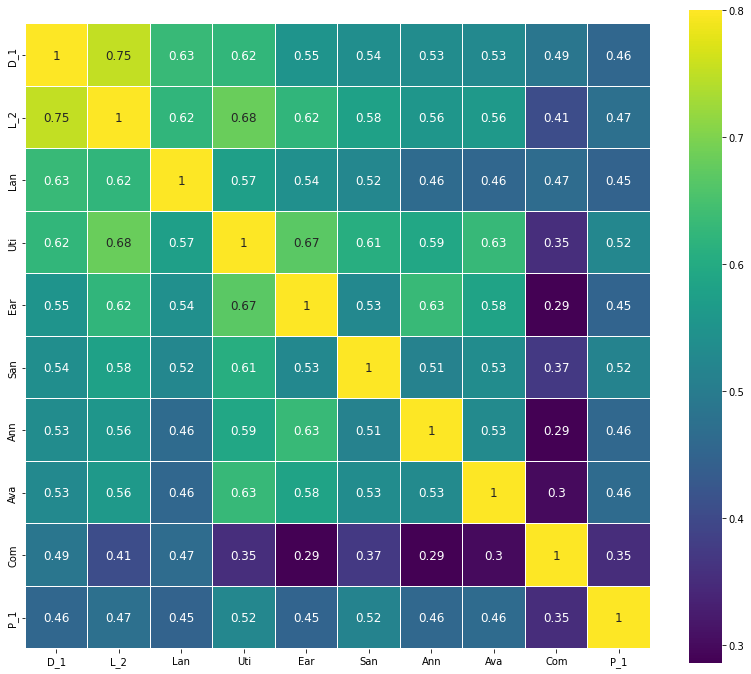

In [87]:
cm = np.corrcoef(merged_df[cols].values.T)
f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(cm, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='viridis',linecolor="white",xticklabels = cols.values ,annot_kws = {'size':12},yticklabels = cols.values)

The features are not correlated (>0.70) however I will used these 11 features for PCA

Heatmap to Check correlation among features


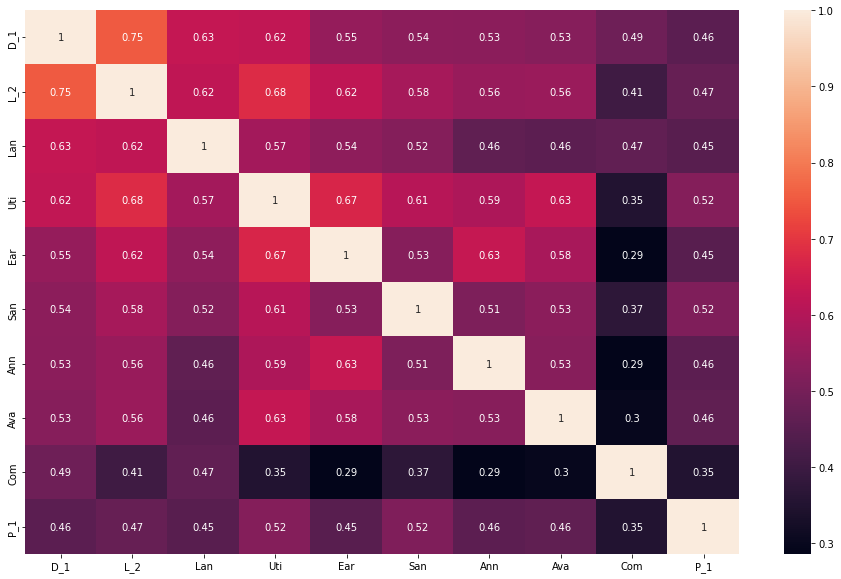



This is how the dataset looks after PCA operation
[[ 0.05731045 -0.18209197  0.01963825 ...  0.0799792  -0.03264005
  -0.04720469]
 [ 1.02201722 -1.04618755  0.75935759 ...  0.11141559  0.15161287
  -0.06339027]
 [-0.50090047  0.1621351   0.05387071 ...  0.0522869  -0.02077236
   0.00555577]
 ...
 [-0.45782213  0.18939809 -0.00625425 ...  0.04401656 -0.03264762
  -0.00295083]
 [-0.36855327  0.10167673 -0.00994079 ...  0.04250993 -0.03660415
  -0.00301046]
 [ 0.6103395  -0.47887336 -0.19586937 ... -0.40102412  0.03896142
  -0.04732295]]

Shape of the dataset
(1632, 10)

pca.explained_variance_ratio_: [0.55829632 0.13373011 0.09171927 0.05598795 0.04131804 0.03661904
 0.03316903 0.02573193 0.01397075 0.00945757]

Cumulative_pca.explained_vairance_ratio: [0.55829632 0.69202643 0.7837457  0.83973365 0.88105169 0.91767073
 0.95083976 0.97657168 0.99054243 1.        ]

pca.components_: [[-0.22022587 -0.29989385 -0.32224407 -0.17249992 -0.26781392 -0.27083373
  -0.24111902 -0.33268865 -0.24

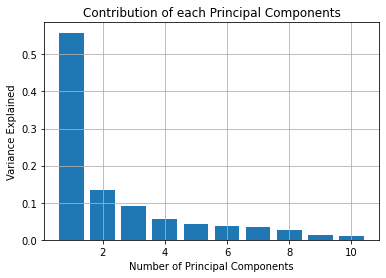

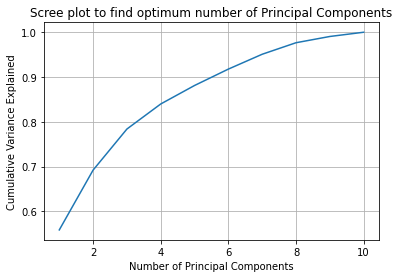

In [88]:
from sklearn.decomposition import PCA

# the list is based on the correlation matrix
Disaster = merged_df[['D_1', 'L_2', 'Lan', 'Uti', 'Ear', 'San', 'Ann', 'Ava', 'Com', 'P_1']]

PCA_Index_Gen(Disaster)

In [89]:
df_Scaled = Disaster    
pca = PCA(n_components=1,random_state=100)
Disaster_ind = pd.DataFrame(pca.fit_transform(df_Scaled),index=merged_df.index.copy(),columns=['Disaster_ind'])
Disaster_ind

,Disaster_ind
city_munic,
Aborlan,0.057310
Abra De Ilog,1.022017
Abucay,-0.500900
Abulug,0.711512
Abuyog,-0.197451
...,...
City of Zamboanga,-1.663320
Zamboanguita,0.056910
Zaragoza,-0.457822


In [90]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_Scaled)
Disaster_ind = pd.DataFrame(data = principalComponents, index=merged_df.index.copy(),columns = ['PC1', 'PC2'])
Disaster_ind.head()

,PC1,PC2
city_munic,,
Aborlan,0.057310,-0.182092
Abra De Ilog,1.022017,-1.046188
Abucay,-0.500900,0.162135
Abulug,0.711512,-0.019207
Abuyog,-0.197451,0.344637


In [91]:
Disaster_ind['Disaster_ind'] = Disaster_ind['PC1'] + Disaster_ind['PC2']

In [92]:
Disaster_ind = Disaster_ind.drop(['PC1', 'PC2'], axis=1)
Disaster_ind.head()

,Disaster_ind
city_munic,
Aborlan,-0.124782
Abra De Ilog,-0.024170
Abucay,-0.338765
Abulug,0.692304
Abuyog,0.147186


In [93]:
# Top 10 municipality with highest disaster index

top_10 = Disaster_ind['Disaster_ind'].nlargest(10)
top_10

city_munic
Lugus                   5.611810
Kalingalan Caluang      5.479047
Hadji Panglima Tahil    5.435391
Hadji Mohammad Ajul     5.423580
Tuburan                 5.160495
Patikul                 5.095869
Pandami                 4.848050
Pangutaran              4.761262
Ungkaya Pukan           4.729715
Indanan                 4.561375
Name: Disaster_ind, dtype: float64

In [94]:
bot_10 = Disaster_ind['Disaster_ind'].nsmallest(10)
bot_10

city_munic
City of Calapan        -2.430131
City of Antipolo       -2.391120
Quezon City            -2.348335
City of San Fernando   -2.339288
City of San Pablo      -2.337748
City of Biñan          -2.323750
City of Kidapawan      -2.306836
City of Cotabato       -2.306044
City of Legazpi        -2.294281
City of Imus           -2.294206
Name: Disaster_ind, dtype: float64

The low index score means having a high vulnerability in Disaster

## Health Index

In [95]:
correlation = merged_df.corr()
print(correlation['Hea'].sort_values(ascending=False), '\n')

Hea           1.000000
C_3           0.829003
Fin           0.763914
Hospital_1    0.731523
Edu           0.707605
                ...   
DepEd Cl_1         NaN
General _1         NaN
Municipa_1         NaN
Provinci_1         NaN
Psychiat_1         NaN
Name: Hea, Length: 76, dtype: float64 



In [96]:
k = 20
cols = correlation.nlargest(k, 'Hea')['Hea'].index
print(cols)

Index(['Hea', 'C_3', 'Fin', 'Hospital_1', 'Edu', 'C_4', 'Eme', 'Tra', 'F_1',
       'PHARMACIST', 'Act', 'Bud', 'NURSE', 'NUTRITIONI', 'MIDWIFE', 'DOCTOR',
       'MEDICAL TE', 'LGU', 'Cap', 'RADIOLOGY'],
      dtype='object')


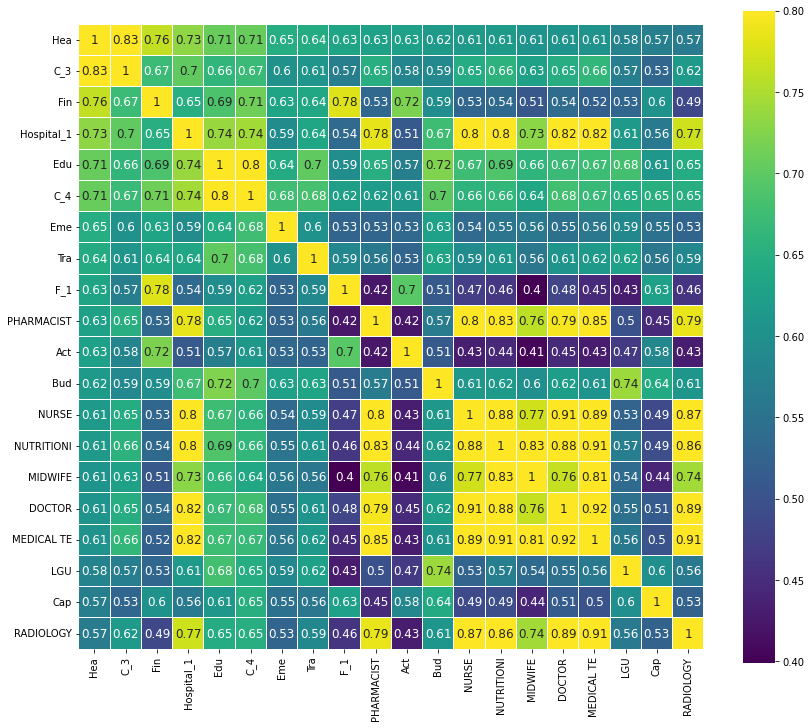

In [97]:
cm = np.corrcoef(merged_df[cols].values.T)
f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(cm, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='viridis',linecolor="white",xticklabels = cols.values ,annot_kws = {'size':12},yticklabels = cols.values)

Heatmap to Check correlation among features


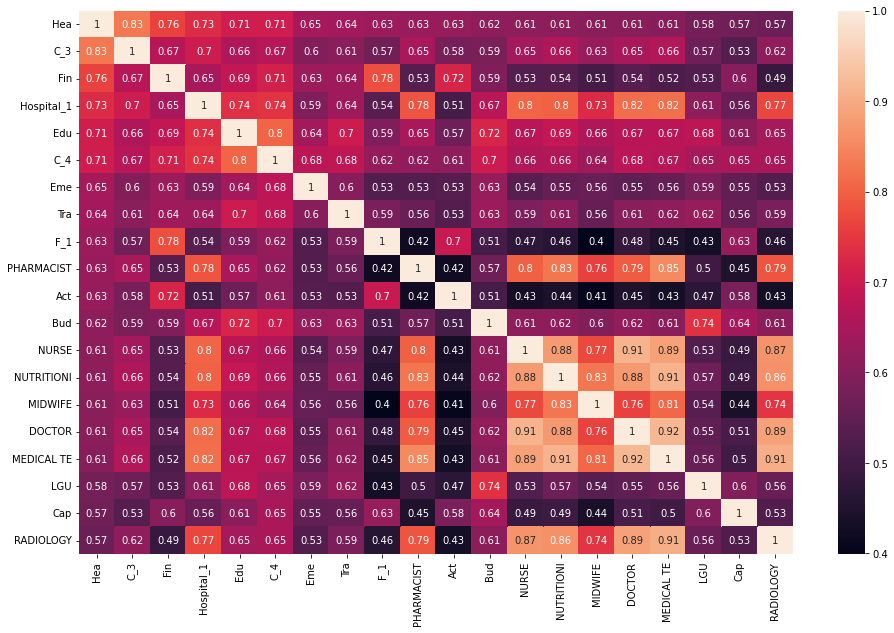



This is how the dataset looks after PCA operation
[[-2.88916917e+02  8.71989526e+00 -3.63891231e-01 ...  3.17915525e-03
   1.00184312e-02 -1.72742916e-02]
 [-2.93561716e+02 -2.61814107e-01 -7.03531210e+00 ...  1.10075179e-02
   6.70647453e-03  4.06168170e-02]
 [-3.06730066e+02  1.78229897e+01 -1.51493220e+00 ... -3.91822802e-02
  -1.61831213e-02  2.65790603e-02]
 ...
 [-2.88872444e+02  8.74611195e+00  2.55077946e+00 ... -5.61830405e-02
  -1.24316999e-01 -1.55518799e-02]
 [-2.48925981e+02 -2.29017668e+01 -1.85626207e+00 ... -2.16141648e-02
  -6.95143557e-03 -1.16389019e-02]
 [-3.24832885e+02  4.43891975e+00 -6.66693685e+00 ... -1.59236881e-02
   2.28279724e-02 -2.43397640e-03]]

Shape of the dataset
(1632, 20)

pca.explained_variance_ratio_: [9.69800066e-01 3.00213379e-02 1.38872713e-04 2.53112161e-05
 9.31310378e-06 3.30456583e-06 9.80061145e-07 6.61657665e-07
 7.67361296e-08 1.67373664e-08 1.34800755e-08 1.02426539e-08
 7.73581092e-09 7.03709507e-09 6.04458675e-09 4.94197401e-09
 2.

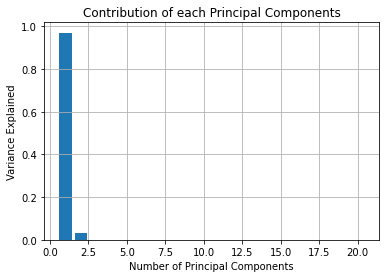

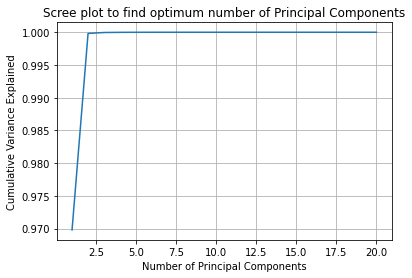

In [98]:
Healthcare = merged_df[['Hea', 'C_3', 'Fin', 'Hospital_1', 'Edu', 'C_4', 'Eme', 'Tra', 'F_1',
       'PHARMACIST', 'Act', 'Bud', 'NURSE', 'NUTRITIONI', 'MIDWIFE', 'DOCTOR',
       'MEDICAL TE', 'LGU', 'Cap', 'RADIOLOGY']]
PCA_Index_Gen(Healthcare)

This is the first correlation before the number of doctors are included

Healthcare = merged_df[['Hea', 'C_3', 'Fin', 'Hospital_1', 'Edu', 'C_4', 'Eme', 'Tra', 'F_1',
       'Act', 'Bud', 'LGU', 'Cap', 'Pro', 'Rec', 'Ava', 'Inf', 'Emp',
       'Birthing_1', 'Saf']]
PCA_Index_Gen(Healthcare)

In [99]:
df_Scaled = Healthcare   
pca = PCA(n_components=1,random_state=100)
Healthcare_ind = pd.DataFrame(pca.fit_transform(df_Scaled),index=merged_df.index.copy(),columns=['Healthcare_ind'])
top_10 = Healthcare_ind['Healthcare_ind'].nlargest(10)
top_10

city_munic
City of Manila            5851.596644
City of Pasig             5851.596509
Pasay City                5851.485094
City of Cagayan De Oro    5851.407629
City of Tarlac            5851.186674
City of San Fernando      5851.062227
City of Baguio            5851.054389
City of Cabanatuan        5850.598823
City of Dagupan           5850.424658
City of Parañaque         5816.025975
Name: Healthcare_ind, dtype: float64

In [100]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_Scaled)
Healthcare_ind = pd.DataFrame(data = principalComponents, index=merged_df.index.copy(),columns = ['PC1', 'PC2'])
Healthcare_ind['Healthcare_ind'] = Healthcare_ind['PC1'] + Healthcare_ind['PC2']
Healthcare_ind = Healthcare_ind.drop(['PC1', 'PC2'], axis=1)
Healthcare_ind.head()

,Healthcare_ind
city_munic,
Aborlan,-280.197022
Abra De Ilog,-293.823530
Abucay,-288.907076
Abulug,-293.637468
Abuyog,-120.316087


In [101]:
Healthcare_ind.head()

,Healthcare_ind
city_munic,
Aborlan,-280.197022
Abra De Ilog,-293.823530
Abucay,-288.907076
Abulug,-293.637468
Abuyog,-120.316087


Inverting the index because higher index score doesnt necesarrily mean a high vulnerability on Healthcare sector

In [102]:
Healthcare_ind['Healthcare_ind'] = Healthcare_ind['Healthcare_ind'].max() - Healthcare_ind['Healthcare_ind'] + Healthcare_ind['Healthcare_ind'].min()

In [103]:
Healthcare_ind.head()

,Healthcare_ind
city_munic,
Aborlan,6111.666368
Abra De Ilog,6125.292876
Abucay,6120.376422
Abulug,6125.106815
Abuyog,5951.785434


In [104]:
# Sanity check
bot_10 = Healthcare_ind['Healthcare_ind'].nsmallest(10)
bot_10

city_munic
City of Manila           -320.394149
City of Pasig            -320.393896
Pasay City               -320.209754
City of Cagayan De Oro   -320.009106
City of Tarlac           -319.736607
City of Baguio           -319.531802
City of San Fernando     -319.455944
City of Cabanatuan       -318.809014
City of Dagupan          -318.394490
City of Parañaque        -302.017555
Name: Healthcare_ind, dtype: float64

### Poverty Index

In [105]:
correlation = merged_df.corr()
print(correlation['Cos'].sort_values(ascending=False), '\n')

Cos           1.000000
Soc           0.086389
L_1           0.084633
Saf           0.061513
Child He_1    0.049318
                ...   
DepEd Cl_1         NaN
General _1         NaN
Municipa_1         NaN
Provinci_1         NaN
Psychiat_1         NaN
Name: Cos, Length: 76, dtype: float64 



In [106]:
k = 6
cols = correlation.nlargest(k, 'Cos')['Cos'].index
print(cols)

Index(['Cos', 'Soc', 'L_1', 'Saf', 'Child He_1', 'Pea'], dtype='object')


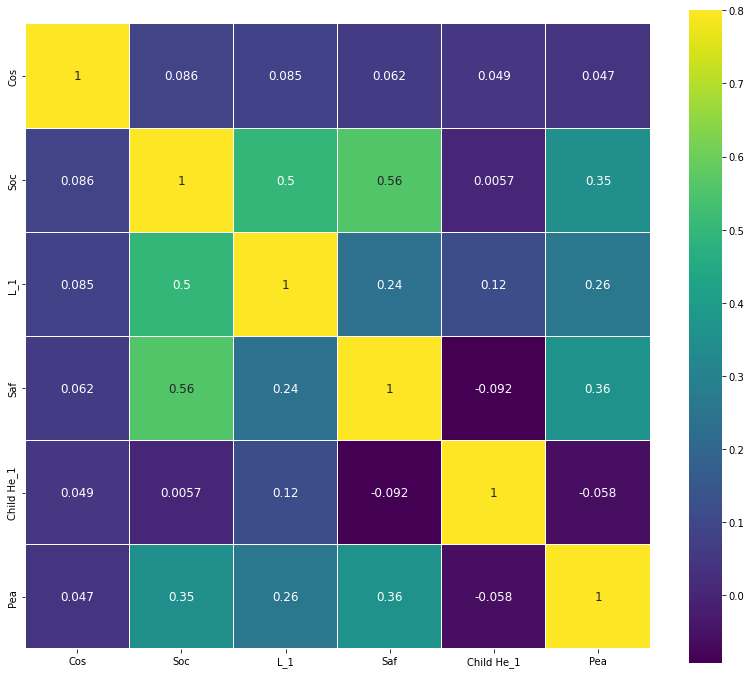

In [107]:
cm = np.corrcoef(merged_df[cols].values.T)
f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(cm, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='viridis',linecolor="white",xticklabels = cols.values ,annot_kws = {'size':12},yticklabels = cols.values)

Based on the matrix, the correlation is too low, Thus, only 5 features will be included for the poverty index

Heatmap to Check correlation among features


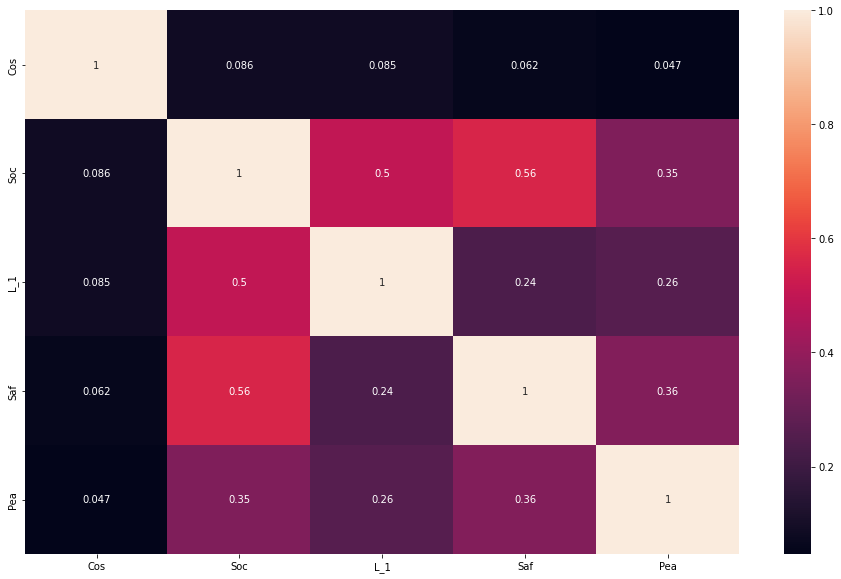



This is how the dataset looks after PCA operation
[[-0.33449243 -0.04750201  0.09370956 -0.01860562 -0.06259613]
 [-0.36144961  0.00195188 -0.03798933 -0.02178172 -0.06343639]
 [ 0.50423343  0.08353724 -0.05609513 -0.0808067  -0.03819536]
 ...
 [ 0.48180966  0.08554677  0.02483102  0.04245748  0.12584776]
 [ 0.37937336 -0.29461126 -0.0193408   0.02335207 -0.00314973]
 [-0.11239788  0.25015542 -0.21815612 -0.16173184  0.14994473]]

Shape of the dataset
(1632, 5)

pca.explained_variance_ratio_: [0.44554597 0.35370632 0.10698088 0.05338246 0.04038437]

Cumulative_pca.explained_vairance_ratio: [0.44554597 0.79925229 0.90623318 0.95961563 1.        ]

pca.components_: [[ 0.44367515  0.73033281  0.21078413  0.45318127  0.14129099]
 [-0.89592052  0.36156656  0.08258785  0.23507401  0.06719751]
 [ 0.01384381 -0.45139572 -0.30924279  0.83320259  0.07869303]
 [-0.0166452  -0.35970879  0.84473395  0.0823474   0.38726732]
 [ 0.00317401  0.0522982  -0.37355421 -0.19585531  0.90518107]]




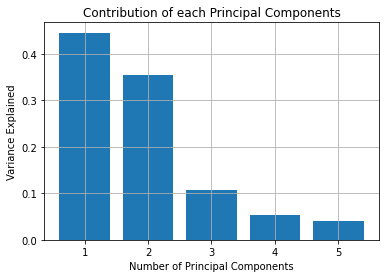

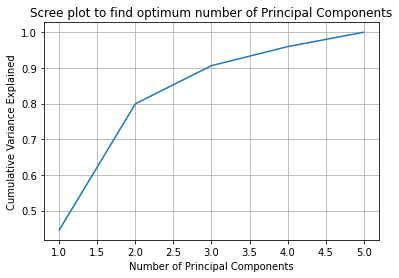

In [108]:
Poverty = merged_df[['Cos', 'Soc', 'L_1', 'Saf', 'Pea']]
PCA_Index_Gen(Poverty)

In [109]:
df_Scaled = Poverty
pca = PCA(n_components=1,random_state=100)
Poverty_ind = pd.DataFrame(pca.fit_transform(df_Scaled),index=merged_df.index.copy(),columns=['Poverty_ind'])

In [110]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_Scaled)
Poverty_ind = pd.DataFrame(data = principalComponents, index=merged_df.index.copy(),columns = ['PC1', 'PC2'])
Poverty_ind['Poverty_ind'] = Poverty_ind['PC1'] + Poverty_ind['PC2']
Poverty_ind = Poverty_ind.drop(['PC1', 'PC2'], axis=1)
Poverty_ind.head()

,Poverty_ind
city_munic,
Aborlan,-0.381994
Abra De Ilog,-0.359498
Abucay,0.587771
Abulug,0.596418
Abuyog,-0.204591


In [111]:
bot_10 = Poverty_ind['Poverty_ind'].nsmallest(10)
bot_10

city_munic
Hadji Panglima Tahil   -0.822805
Lantawan               -0.819387
Sumisip                -0.814069
Lugus                  -0.811517
Panglima Estino        -0.811517
Tapul                  -0.811517
Old Panamao            -0.811038
Tongkil                -0.808560
Pangutaran             -0.808285
Kalingalan Caluang     -0.805419
Name: Poverty_ind, dtype: float64

In [112]:
top_10 = Poverty_ind['Poverty_ind'].nlargest(10)
top_10

city_munic
Pasay City                1.785514
Quezon City               1.718965
City of Davao             1.694613
City of Cagayan De Oro    1.655410
City of Manila            1.641695
City of Antipolo          1.522094
Batangas City             1.513435
City of Dasmariñas        1.507623
City of Bacoor            1.475246
City of Imus              1.454726
Name: Poverty_ind, dtype: float64

Inverting the poverty index so that it would make sense

In [113]:
Poverty_ind['Poverty_ind'] = Poverty_ind['Poverty_ind'].max() - Poverty_ind['Poverty_ind'] + Poverty_ind['Poverty_ind'].min()

### Decent Work and Economic Index

In [114]:
correlation =  merged_df.corr()
print(correlation['Loc'].sort_values(ascending=False), ' \n')

Loc           1.000000
Pro           0.774544
Cap           0.674717
Emp           0.628367
F_1           0.553875
                ...   
DepEd Cl_1         NaN
General _1         NaN
Municipa_1         NaN
Provinci_1         NaN
Psychiat_1         NaN
Name: Loc, Length: 76, dtype: float64  



In [115]:
k = 10
cols = correlation.nlargest(k, 'Loc')['Loc'].index
cols

Index(['Loc', 'Pro', 'Cap', 'Emp', 'F_1', 'Act', 'Fin', 'Bud', 'C_4', 'LGU'], dtype='object')

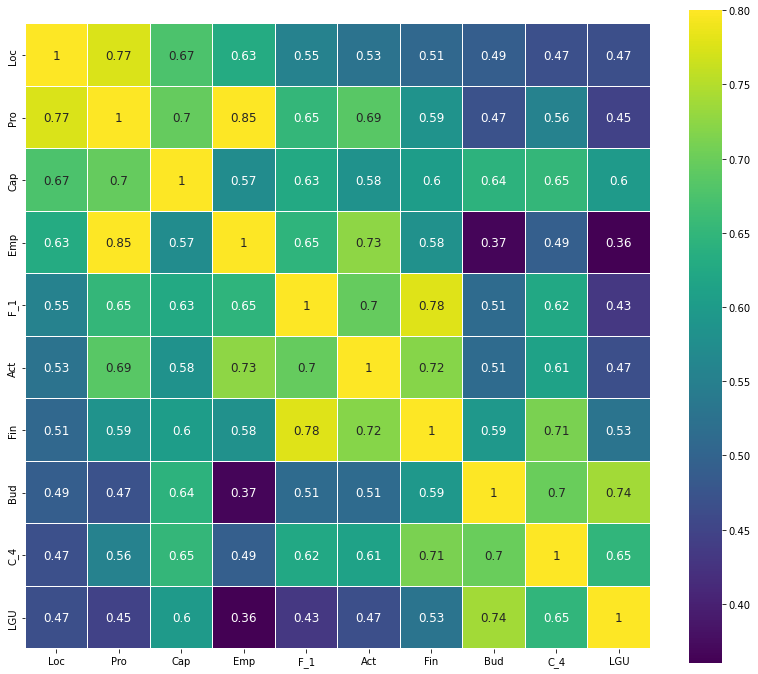

In [116]:
cm = np.corrcoef(merged_df[cols].values.T)
f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(cm, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='viridis',linecolor="white",xticklabels = cols.values ,annot_kws = {'size':12},yticklabels = cols.values)

Heatmap to Check correlation among features


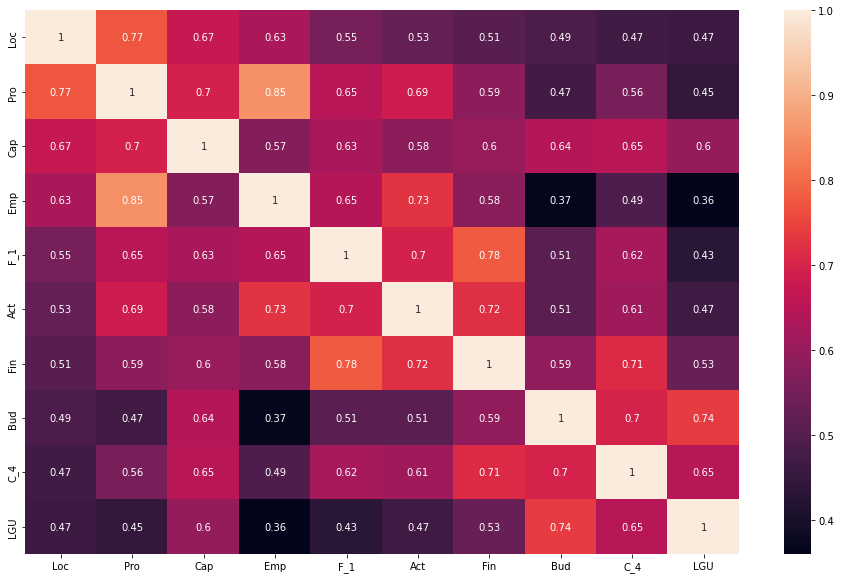



This is how the dataset looks after PCA operation
[[-0.24382715 -0.03230444  0.00099237 ...  0.00341158  0.01522445
  -0.00953889]
 [-0.34131857 -0.03531441  0.06900887 ... -0.0089829   0.01744773
  -0.00505837]
 [ 0.41471287  0.26644034  0.00305022 ... -0.09615592 -0.00802363
  -0.03988084]
 ...
 [ 0.5378027  -0.07580239 -0.2473483  ... -0.02764831 -0.04032425
  -0.03150839]
 [ 0.09001946  0.06784181 -0.06002319 ... -0.02114902 -0.00198815
  -0.01208418]
 [-0.18437257  0.00710364  0.05778066 ... -0.0567709  -0.03751812
   0.02206629]]

Shape of the dataset
(1632, 10)

pca.explained_variance_ratio_: [0.67490532 0.0950053  0.07019035 0.05117732 0.03022391 0.02440458
 0.01866449 0.01548944 0.01089432 0.00904495]

Cumulative_pca.explained_vairance_ratio: [0.67490532 0.76991063 0.84010098 0.8912783  0.92150221 0.94590679
 0.96457128 0.98006072 0.99095505 1.        ]

pca.components_: [[ 1.73720653e-01  3.12266709e-01  2.60265482e-01  3.85752590e-01
   3.74716559e-01  4.74606779e-01  4.22

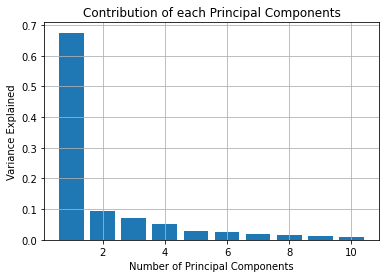

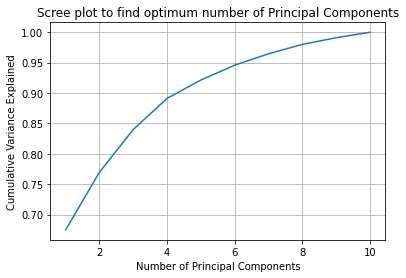

In [117]:
Economic = merged_df[['Loc', 'Pro', 'Cap', 'Emp', 'F_1', 'Act', 'Fin', 'Bud', 'C_4', 'LGU']]
PCA_Index_Gen(Economic)

In [118]:
df_Scaled = Economic
pca = PCA(n_components=1,random_state=100)
Economic_ind = pd.DataFrame(pca.fit_transform(df_Scaled),index=merged_df.index.copy(),columns=['Economic_ind'])
top_10 = Economic_ind['Economic_ind'].nlargest(10)
top_10

city_munic
City of Calamba       2.252678
City of Antipolo      2.204198
Quezon City           2.199432
City of Makati        2.161091
City of Dasmariñas    2.139406
Cainta                2.138265
City of Naga          2.090379
City of Imus          2.086294
City of Manila        2.055895
Batangas City         1.967377
Name: Economic_ind, dtype: float64

In [119]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_Scaled)
Economic_ind = pd.DataFrame(data = principalComponents, index=merged_df.index.copy(),columns = ['PC1', 'PC2'])
Economic_ind['Economic_ind'] = Economic_ind['PC1'] + Economic_ind['PC2']
Economic_ind = Economic_ind.drop(['PC1', 'PC2'], axis=1)
Economic_ind.head()

,Economic_ind
city_munic,
Aborlan,-0.276132
Abra De Ilog,-0.376633
Abucay,0.681153
Abulug,0.359664
Abuyog,-0.255461


In [120]:
top_10 = Economic_ind['Economic_ind'].nlargest(10)
top_10

city_munic
Cainta                2.292392
Panglao               2.218198
City of Calamba       2.209926
City of Makati        2.185502
City of Dasmariñas    2.123643
City of Antipolo      2.100309
City of Naga          2.083882
Mambajao              2.069549
Quezon City           2.027524
City of Legazpi       1.999310
Name: Economic_ind, dtype: float64

Just like the healthcare index, I am inverting this one.

In [121]:
Economic_ind['Economic_ind'] = Economic_ind['Economic_ind'].max() - Economic_ind['Economic_ind'] + Economic_ind['Economic_ind'].min()

In [122]:
# Sanity Check
bot_10 = Economic_ind['Economic_ind'].nsmallest(10)
bot_10

city_munic
Cainta               -0.522543
Panglao              -0.448349
City of Calamba      -0.440077
City of Makati       -0.415654
City of Dasmariñas   -0.353794
City of Antipolo     -0.330460
City of Naga         -0.314033
Mambajao             -0.299700
Quezon City          -0.257675
City of Legazpi      -0.229461
Name: Economic_ind, dtype: float64

In [123]:
# Merging all the data

dti_index = pd.concat([Disaster_ind,Economic_ind,Healthcare_ind,Poverty_ind],axis=1)
dti_index

,Disaster_ind,Economic_ind,Healthcare_ind,Poverty_ind
city_munic,,,,
Aborlan,-0.124782,2.045980,6111.666368,1.344704
Abra De Ilog,-0.024170,2.146482,6125.292876,1.322207
Abucay,-0.338765,1.088696,6120.376422,0.374939
Abulug,0.692304,1.410185,6125.106815,0.366292
Abuyog,0.147186,2.025310,5951.785434,1.167301
...,...,...,...,...
City of Zamboanga,-1.830662,1.892501,1430.463142,0.434479
Zamboanguita,-0.608573,1.881614,6120.737270,0.524020
Zaragoza,-0.268424,1.307849,6111.595678,0.395353


## Scalling
- important to make sure that all the data are scalled

In [124]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dti_new = scaler.fit_transform(dti_index)
dti_new

array([[-0.12100029,  0.67271216,  0.3033878 ,  0.97248898],
       [-0.0234379 ,  0.91755379,  0.31814212,  0.91521643],
       [-0.32849985, -1.65942638,  0.31281875, -1.49635816],
       ...,
       [-0.26029005, -1.12552579,  0.30331126, -1.44438718],
       [-0.25878944, -0.38458183,  0.29432583, -0.21578903],
       [ 0.12748235,  0.43186281,  0.34691168, -0.35070585]])

In [125]:
# Converting it to a dataframe
dti_new = pd.DataFrame(dti_new, columns=dti_index.columns)
dti_new.head()

,Disaster_ind,Economic_ind,Healthcare_ind,Poverty_ind
0,-0.121000,0.672712,0.303388,0.972489
1,-0.023438,0.917554,0.318142,0.915216
2,-0.328500,-1.659426,0.312819,-1.496358
3,0.671326,-0.876214,0.317941,-1.518372
4,0.142726,0.622354,0.130274,0.520853


## Modelling

In [126]:
# Check the hopkins

#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [127]:
hopkins(dti_new)

0.9449990375079914

Hopkins statistic is 94.42% which is more than the 80% threshold, this shows that the formation of cluster tendency is good.

## K - Means Clustering

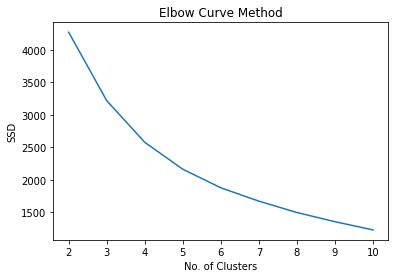

In [128]:
# Using Elbow Curve Method

from sklearn.cluster import KMeans
ssd = []
for num_clusters in range(2,11):
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(dti_new)
    ssd.append([num_clusters,kmeans.inertia_])
temp = pd.DataFrame(ssd)
plt.title('Elbow Curve Method')
plt.xlabel('No. of Clusters')
plt.ylabel('SSD')
plt.plot(temp[0],temp[1])

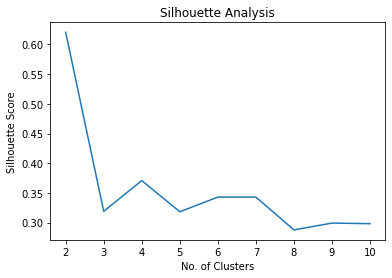

In [129]:
# Using silhouoette analysis

from sklearn.metrics import silhouette_score
sa = []
for num_clusters in range(2,11):
    kmeans = KMeans(n_clusters=num_clusters,max_iter=50)
    kmeans.fit(dti_new)
    sa.append([num_clusters,silhouette_score(dti_new,kmeans.labels_)])
temp = pd.DataFrame(sa)
plt.title('Silhouette Analysis')
plt.xlabel('No. of Clusters')
plt.ylabel('Silhouette Score')
plt.plot(temp[0], temp[1])

both the elbow and silhouette analysis is showing an unclear no of clusters. k = 3,5 and 8 looks good. I will only use 3 clusters

## K-Means Modelling

In [130]:
# final model with k=3
kmeans = KMeans(n_clusters=3, random_state=50)
kmeans.fit(dti_new)

KMeans(n_clusters=3, random_state=50)

In [131]:
kmeans.labels_

array([1, 1, 2, ..., 2, 2, 1], dtype=int32)

In [132]:
# assign the label
dti_index['cluster_id'] = kmeans.labels_
dti_index.head()

,Disaster_ind,Economic_ind,Healthcare_ind,Poverty_ind,cluster_id
city_munic,,,,,
Aborlan,-0.124782,2.045980,6111.666368,1.344704,1
Abra De Ilog,-0.024170,2.146482,6125.292876,1.322207,1
Abucay,-0.338765,1.088696,6120.376422,0.374939,2
Abulug,0.692304,1.410185,6125.106815,0.366292,2
Abuyog,0.147186,2.025310,5951.785434,1.167301,1


In [133]:
dti_new = dti_new.set_index(dti_index.index)

In [134]:
dti_new['cluster_id'] = kmeans.labels_
dti_new.head()

,Disaster_ind,Economic_ind,Healthcare_ind,Poverty_ind,cluster_id
city_munic,,,,,
Aborlan,-0.121000,0.672712,0.303388,0.972489,1
Abra De Ilog,-0.023438,0.917554,0.318142,0.915216,1
Abucay,-0.328500,-1.659426,0.312819,-1.496358,2
Abulug,0.671326,-0.876214,0.317941,-1.518372,2
Abuyog,0.142726,0.622354,0.130274,0.520853,1


### Cluster Profiling

In [135]:
dti_new['cluster_id'].value_counts()

1    955
2    595
0     82
Name: cluster_id, dtype: int64

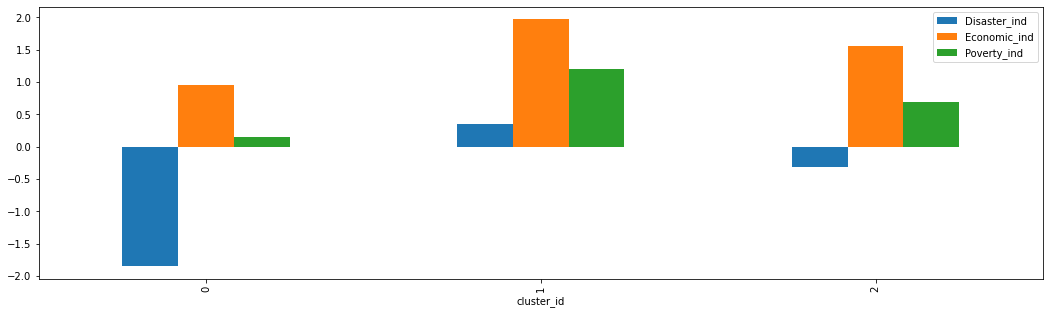

In [136]:
dti_index[['Disaster_ind','Economic_ind','Poverty_ind']].groupby(dti_index['cluster_id']).mean().plot(figsize = (18,5),kind = 'bar')

## Definition of each cluster

    Cluster 0 - they have the highest vulnerability in disaster, highest vulnerability in healthcare and highest vulnerability in economic
    Cluster 1 - they have a moderate vulnerability in disaster, moderate vulnerability in healthcare, moderate vulnerability in poverty and moderate vulnerability in economic. 
    Cluster 2 - they have a lower vulnerability in poverty, economic, poverty and disaster
 
    
- Cluster 0 is the worse, while cluster 2 is better



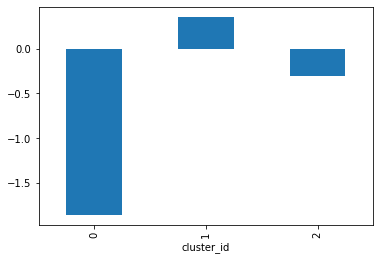

In [137]:
dti_index['Disaster_ind'].groupby(dti_index['cluster_id']).mean().plot(kind = 'bar')

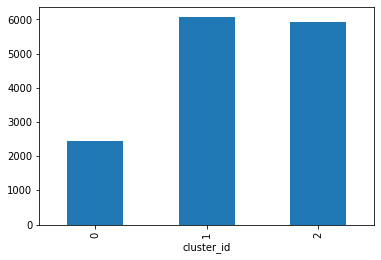

In [138]:
dti_index['Healthcare_ind'].groupby(dti_index['cluster_id']).mean().plot(kind = 'bar')

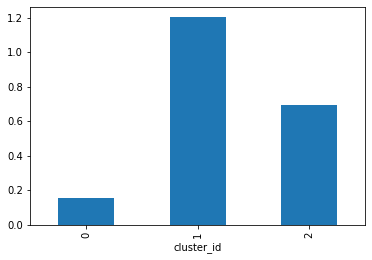

In [139]:
dti_index['Poverty_ind'].groupby(dti_index['cluster_id']).mean().plot(kind = 'bar')

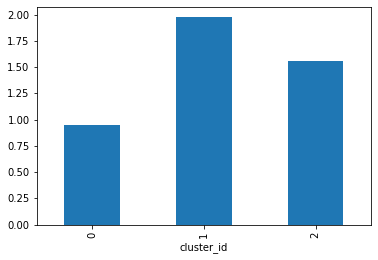

In [140]:
dti_index['Economic_ind'].groupby(dti_index['cluster_id']).mean().plot(kind = 'bar')

## Mapping the city/muncipality based on their clusters

In [141]:
geo = gpd.read_file('/content/drive/MyDrive/Projects/philippines-chapter-urban-vunerability/src/data/merged-dataset/merged-dataset-shpfile/merged-dataset.shp')

ERROR:fiona._env:Pointer 'hGeom' is NULL in 'OGR_G_GetGeometryType'.

ERROR:fiona._env:Pointer 'hGeom' is NULL in 'OGR_G_GetGeometryType'.

ERROR:fiona._env:Pointer 'hGeom' is NULL in 'OGR_G_GetGeometryType'.

ERROR:fiona._env:Pointer 'hGeom' is NULL in 'OGR_G_GetGeometryType'.

ERROR:fiona._env:Pointer 'hGeom' is NULL in 'OGR_G_GetGeometryType'.

ERROR:fiona._env:Pointer 'hGeom' is NULL in 'OGR_G_GetGeometryType'.

ERROR:fiona._env:Pointer 'hGeom' is NULL in 'OGR_G_GetGeometryType'.

ERROR:fiona._env:Pointer 'hGeom' is NULL in 'OGR_G_GetGeometryType'.



In [142]:
dti_index.head()

,Disaster_ind,Economic_ind,Healthcare_ind,Poverty_ind,cluster_id
city_munic,,,,,
Aborlan,-0.124782,2.045980,6111.666368,1.344704,1
Abra De Ilog,-0.024170,2.146482,6125.292876,1.322207,1
Abucay,-0.338765,1.088696,6120.376422,0.374939,2
Abulug,0.692304,1.410185,6125.106815,0.366292,2
Abuyog,0.147186,2.025310,5951.785434,1.167301,1


In [143]:
geo.head()

,psgc,name,city_munic,province,clean_idx,longitude,latitude,coords,2018 - Loc,2018 - L_1,...,Child He_1,Single Hea,Single H_1,Disability,Disabili_1,Solo Paren,Solo Par_1,Older_Male,Older_Fema,geometry
0,1705301000,Aborlan,Aborlan,Palawan,"aborlan, palawan",118.548417,9.437101,"9.4371009, 118.5484168",0.0072,0.0224,...,3,580,17,1240,1040,620,1290,1990,1730,"MULTIPOLYGON (((118.57998 9.37215, 118.57982 9..."
1,1705101000,Abra De Ilog,Abra De Ilog,Occidental Mindoro,"abradeilog, occidentalmindoro",120.726826,13.443721,"13.4437209, 120.7268262",0.0027,0.0102,...,1,430,9,980,890,1030,1610,2040,1900,"POLYGON ((120.60896 13.35233, 120.60797 13.373..."
2,300801000,Abucay,Abucay,Bataan,"abucay, bataan",120.534870,14.721315,"14.7213146, 120.5348704",0.0488,0.0020,...,0,1460,6,330,180,110,530,340,400,"POLYGON ((120.45676 14.69671, 120.45620 14.696..."
3,201501000,Abulug,Abulug,Cagayan,"abulug, cagayan",121.457273,18.443485,"18.4434854, 121.4572732",0.0651,0.0052,...,0,90,8,610,380,320,760,1170,1440,"MULTIPOLYGON (((121.40276 18.40896, 121.40276 ..."
4,803701000,Abuyog,Abuyog,Leyte,"abuyog, leyte",125.011485,10.747102,"10.747102, 125.0114853",0.0115,0.0208,...,1,550,7,2010,2260,1840,3920,4270,4920,"POLYGON ((125.04650 10.56751, 125.04588 10.576..."


In [144]:
geo = geo[['city_munic','longitude', 'latitude', 'coords','geometry']]

In [145]:
# setting city_munic as index
geo = geo.set_index('city_munic')

In [146]:
geo.shape

(1634, 4)

In [147]:
# need to remove the other 2 municipality

geo = geo.drop(["Brooke'S Point","T'Boli"])

# merging dti index with cluster and geo data
geo = pd.concat([geo, dti_index], axis=1)
geo.head()

,longitude,latitude,coords,geometry,Disaster_ind,Economic_ind,Healthcare_ind,Poverty_ind,cluster_id
city_munic,,,,,,,,,
Aborlan,118.548417,9.437101,"9.4371009, 118.5484168","MULTIPOLYGON (((118.57998 9.37215, 118.57982 9...",-0.124782,2.045980,6111.666368,1.344704,1
Abra De Ilog,120.726826,13.443721,"13.4437209, 120.7268262","POLYGON ((120.60896 13.35233, 120.60797 13.373...",-0.024170,2.146482,6125.292876,1.322207,1
Abucay,120.534870,14.721315,"14.7213146, 120.5348704","POLYGON ((120.45676 14.69671, 120.45620 14.696...",-0.338765,1.088696,6120.376422,0.374939,2
Abulug,121.457273,18.443485,"18.4434854, 121.4572732","MULTIPOLYGON (((121.40276 18.40896, 121.40276 ...",0.692304,1.410185,6125.106815,0.366292,2
Abuyog,125.011485,10.747102,"10.747102, 125.0114853","POLYGON ((125.04650 10.56751, 125.04588 10.576...",0.147186,2.025310,5951.785434,1.167301,1


In [148]:
%matplotlib notebook
fig, ax = plt.subplots(figsize=(10,10))
geo.plot(ax=ax, alpha=0.4, color="grey")
geo[geo['cluster_id'] == 0].plot(ax=ax, markersize=1, color="green", marker="o", label="Cluster 0")
plt.title('Cluster 0 city/municipality in Philippines')
plt.legend(prop={"size":15})
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [149]:
geo.plot

In [150]:
%matplotlib notebook
fig, ax = plt.subplots(figsize=(10,10))
geo.plot(ax=ax, alpha=0.4, color="grey")
geo[geo['cluster_id'] == 1].plot(ax=ax, markersize=1, color="green", marker="o", label="Cluster 1")
plt.title('Cluster 1 city/municipality in Philippines')
plt.legend(prop={"size":15})

<IPython.core.display.Javascript object>

In [151]:
%matplotlib notebook
fig, ax = plt.subplots(figsize=(10,10))
geo.plot(ax=ax, alpha=0.4, color="grey")
geo[geo['cluster_id'] == 2].plot(ax=ax, markersize=1, color="green", marker="o", label="Cluster 2")
plt.title('Cluster 2 city/municipality in Philippines')
plt.legend(prop={"size":15})

<IPython.core.display.Javascript object>

In [152]:
%matplotlib notebook
fig, ax = plt.subplots(figsize=(10,10))
geo.plot(ax=ax, alpha=0.4, color="grey")
geo[geo['cluster_id'] == 2].plot(ax=ax, markersize=1, color="green", marker="o", label="Cluster 2")
plt.title('Cluster 2 city/municipality in Philippines')
plt.legend(prop={"size":15})

<IPython.core.display.Javascript object>

In [153]:
geo.to_csv('merged_trained_v1.csv')